# Experimenting with EDA and Modeling 

To start off, I'm going to focus all efforts on just NY. Once everything is up and running, I'll scale up to all 50 states.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pymongo
from pprint import pprint
%load_ext autoreload
%autoreload 2
%matplotlib inline
sns.set_style('whitegrid')

import helper_functions
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


### First off, connect to MongoDB

In [2]:
client = pymongo.MongoClient('mongodb://localhost/')
db = client.admin

# Issue the serverStatus command and print the results
serverStatusResult=db.command("serverStatus")
pprint(serverStatusResult)

mydb = client['energy_data']


{'asserts': {'msg': 0, 'regular': 0, 'rollovers': 0, 'user': 7, 'warning': 0},
 'connections': {'active': 1,
                 'available': 3274,
                 'current': 2,
                 'totalCreated': 2},
 'electionMetrics': {'averageCatchUpOps': 0.0,
                     'catchUpTakeover': {'called': 0, 'successful': 0},
                     'electionTimeout': {'called': 0, 'successful': 0},
                     'freezeTimeout': {'called': 0, 'successful': 0},
                     'numCatchUps': 0,
                     'numCatchUpsAlreadyCaughtUp': 0,
                     'numCatchUpsFailedWithError': 0,
                     'numCatchUpsFailedWithNewTerm': 0,
                     'numCatchUpsFailedWithReplSetAbortPrimaryCatchUpCmd': 0,
                     'numCatchUpsSkipped': 0,
                     'numCatchUpsSucceeded': 0,
                     'numCatchUpsTimedOut': 0,
                     'numStepDownsCausedByHigherTerm': 0,
                     'priorityTakeover': {'cal

                          'grantRolesToUser': {'failed': 0, 'total': 0},
                          'hostInfo': {'failed': 0, 'total': 0},
                          'insert': {'failed': 0, 'total': 0},
                          'invalidateUserCache': {'failed': 0, 'total': 0},
                          'isMaster': {'failed': 0, 'total': 2},
                          'killAllSessions': {'failed': 0, 'total': 0},
                          'killAllSessionsByPattern': {'failed': 0, 'total': 0},
                          'killCursors': {'failed': 0, 'total': 0},
                          'killOp': {'failed': 0, 'total': 0},
                          'killSessions': {'failed': 0, 'total': 0},
                          'listCollections': {'failed': 0, 'total': 0},
                          'listCommands': {'failed': 0, 'total': 0},
                          'listDatabases': {'failed': 0, 'total': 0},
                          'listIndexes': {'failed': 0, 'total': 24},
                         

                          'cache overflow cursor application thread wait time (usecs)': 0,
                          'cache overflow cursor internal thread wait time (usecs)': 0,
                          'cache overflow score': 0,
                          'cache overflow table entries': 0,
                          'cache overflow table insert calls': 0,
                          'cache overflow table max on-disk size': 0,
                          'cache overflow table on-disk size': 0,
                          'cache overflow table remove calls': 0,
                          'checkpoint blocked page eviction': 0,
                          'eviction calls to get a page': 173,
                          'eviction calls to get a page found queue empty': 174,
                          'eviction calls to get a page found queue empty after locking': 0,
                          'eviction currently operating in aggressive mode': 0,
                          'eviction empty score': 0,
    

                        'slot joins yield time (usecs)': 0,
                        'slot transitions unable to find free slot': 0,
                        'slot unbuffered writes': 0,
                        'total in-memory size of compressed records': 11989,
                        'total log buffer size': 33554432,
                        'total size of compressed records': 6147,
                        'written slots coalesced': 0,
                        'yields waiting for previous log file close': 0},
                'perf': {'file system read latency histogram (bucket 1) - 10-49ms': 12,
                         'file system read latency histogram (bucket 2) - 50-99ms': 4,
                         'file system read latency histogram (bucket 3) - 100-249ms': 0,
                         'file system read latency histogram (bucket 4) - 250-499ms': 0,
                         'file system read latency histogram (bucket 5) - 500-999ms': 0,
                         'file system read 

In [3]:
print(client.list_database_names())

['admin', 'config', 'energy_data', 'local']


In [4]:
energy_collection = mydb['energy_data']

## Get all states' data

In [15]:
# Get dict with state abbreviations and full names
import csv
state_abbrevs = open('state-abbreviations.csv')
state_abbrevs_reader = csv.reader(state_abbrevs)
state_abbrevs_dict = dict(state_abbrevs_reader)

In [18]:
# Store each state's data from mongodb into a list 
states_data = []
for state in state_abbrevs_dict:
    data = [x for x in energy_collection.find({'state':state_abbrevs_dict[state]})]
    states_data.append({'state':state, 'data':data})

In [21]:
states_data[0]

{'state': 'AL',
 'data': [{'_id': ObjectId('5e17a28bedd91fc8283e95e1'),
   'series_id': 'SEDS.TPOPP.AL.A',
   'description': 'Population',
   'units': 'Thousand',
   'data': [['2017', 4875],
    ['2016', 4865],
    ['2015', 4853],
    ['2014', 4842],
    ['2013', 4830],
    ['2012', 4816],
    ['2011', 4799],
    ['2010', 4785],
    ['2009', 4758],
    ['2008', 4718],
    ['2007', 4673],
    ['2006', 4629],
    ['2005', 4570],
    ['2004', 4531],
    ['2003', 4503],
    ['2002', 4480],
    ['2001', 4468],
    ['2000', 4452],
    ['1999', 4430],
    ['1998', 4405],
    ['1997', 4368],
    ['1996', 4331],
    ['1995', 4297],
    ['1994', 4260],
    ['1993', 4214],
    ['1992', 4154],
    ['1991', 4099],
    ['1990', 4050],
    ['1989', 4030],
    ['1988', 4024],
    ['1987', 4015],
    ['1986', 3992],
    ['1985', 3973],
    ['1984', 3952],
    ['1983', 3934],
    ['1982', 3925],
    ['1981', 3919],
    ['1980', 3900],
    ['1979', 3866],
    ['1978', 3832],
    ['1977', 3780],
    ['197

In [23]:
len(states_data)

50

In [25]:
for state_data in states_data:
    print(len(state_data['data']))

48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48


In [ ]:
# For each state I want list of dataframes

In [ ]:
# Create a dictionary containing all of NY's dataframes
dataframes = {sector: helper_functions.get_energy_pop_df(ny,sector) for sector in sectors}

# Create a dataframe with just the temperature data
temp_df = helper_functions.get_weather_df(ny)

# Concatenate all these bad boys
for sector in dataframes:
    dataframes[sector] = pd.concat([dataframes[sector], temp_df],axis=1)

## Get NY Data, group the data by sector, including total (renewable vs. nonrenewable)

In [6]:
# Generate list of the possible sectors to iterate through
sectors = [series.get('sector') for series in ny]
sectors = list(set(sectors))
sectors.remove(None)
sectors.sort()

renewable_sources = [
    'Biomass',
    'Fuel Ethanol excluding Denaturant',
    'Geothermal',
    'Hydroelectricity',
    'Solar Energy',
    'Wind Energy',
    'Renewable Sources'
    ]

nonrenewable_sources = [
    'All Petroleum Products',
    'Coal',
    'Natural Gas including Supplemental Gaseous Fuels',
    'Nuclear Power',
    'Nonrenewable Sources'
]

In [7]:
print(sectors)

['Commercial Sector', 'Electric Power Sector', 'Industrial Sector', 'Residential Sector', 'Total All Sectors', 'Total End-Use Sectors', 'Transportation Sector']


In [5]:
ny = [x for x in energy_collection.find({'state':'New York'})]

### Make combined Dataframes for each NY sector

In [8]:
# Create a dictionary containing all of NY's dataframes
dataframes = {sector: helper_functions.get_energy_pop_df(ny,sector) for sector in sectors}

# Create a dataframe with just the temperature data
temp_df = helper_functions.get_weather_df(ny)

# Concatenate all these bad boys
for sector in dataframes:
    dataframes[sector] = pd.concat([dataframes[sector], temp_df],axis=1)

In [13]:
dataframes['Total All Sectors']

Population  Natural Gas including Supplemental Gaseous Fuels  \
Date                                                                       
1960-01-01       16838                                            434127   
1961-01-01       17061                                            450630   
1962-01-01       17301                                            491055   
1963-01-01       17461                                            520712   
1964-01-01       17589                                            527890   
1965-01-01       17734                                            558658   
1966-01-01       17843                                            645684   
1967-01-01       17935                                            602670   
1968-01-01       18051                                            653282   
1969-01-01       18105                                            698046   
1970-01-01       18268                                            725813   
1971-01-01       18358                                            731597   
1972-01-01       18339                                            707277   
1973-01-01       18177                                            703023   
1974-01-01       18050                                            641925   
1975-01-01       18003                                            585536   
1976-01-01       17941                                            604276   
1977-01-01       17813                                            567877   
1978-01-01       17681                                            576482   
1979-01-01       17584                                            633562   
1980-01-01       17567                                            755879   
1981-01-01       17568                                            775672   
1982-01-01       17590                                            793099   
1983-01-01       17687                                            739849   
1984-01-01       17746                                            811341   
1985-01-01       17792                                            784737   
1986-01-01       17833                                            749938   
1987-01-01       17869                                            801915   
1988-01-01       17941                                            813134   
1989-01-01       17983                                            870928   
1990-01-01       18021                                            895361   
1991-01-01       18123                                            917236   
1992-01-01       18247                                           1033951   
1993-01-01       18375                                           1023167   
1994-01-01       18459                                           1095583   
1995-01-01       18524                                           1295400   
1996-01-01       18588                                           1230771   
1997-01-01       18657                                           1358091   
1998-01-01       18756                                           1267065   
1999-01-01       18883                                           1308656   
2000-01-01       19002                                           1279693   
2001-01-01       19083                                           1205883   
2002-01-01       19138                                           1227224   
2003-01-01       19176                                           1131362   
2004-01-01       19172                                           1126605   
2005-01-01       19133                                           1107220   
2006-01-01       19105                                           1120200   
2007-01-01       19132                                           1214362   
2008-01-01       19212                                           1205144   
2009-01-01       19307                                           1166620   
2010-01-01       19400                                      

# Visualize NY Renewable vs. Nonrenewable Energy Consumption Across Different Sectors

In [9]:
for sector in sectors:
    
    plot_df = dataframes[sector]
    
    fig = go.Figure()
    
    fig.add_trace(go.Scatter(
        x=plot_df.index,        
        y=plot_df['Nonrenewable Sources'],           
        mode='lines',           
        name='Nonrenewable',
        line_color='#6785be'
        )
    )
    
    fig.add_trace(go.Scatter(
        x=plot_df.index,               
        y=plot_df['Renewable Sources'],                
        mode='lines',               
        name='Renewable',        
        line_color='#f8432d'
        )
    )
    
    
    fig.update_layout(
        title = f'NY Energy Consumption - {sector}',
        template = "plotly_white",
        xaxis_title = 'Year',
        yaxis_title = 'Energy Consumption (Billion Btu)',
        yaxis_showgrid=False,
        xaxis_showgrid=False,
        yaxis_ticks='outside',
        yaxis_tickcolor='white',
        yaxis_ticklen=10,
        yaxis_zeroline=False,
        width = 1000, #1000
        height = 400  #600      
        )
    fig.show()
    filename=sector.lower().replace(' ','_')
#     fig.write_image(f'figures/ny_{filename}_comparison.png',scale=2)

In [27]:
dataframes['Total All Sectors']['Difference'] = dataframes['Total All Sectors']['Nonrenewable Sources'] - dataframes['Total All Sectors']['Renewable Sources']

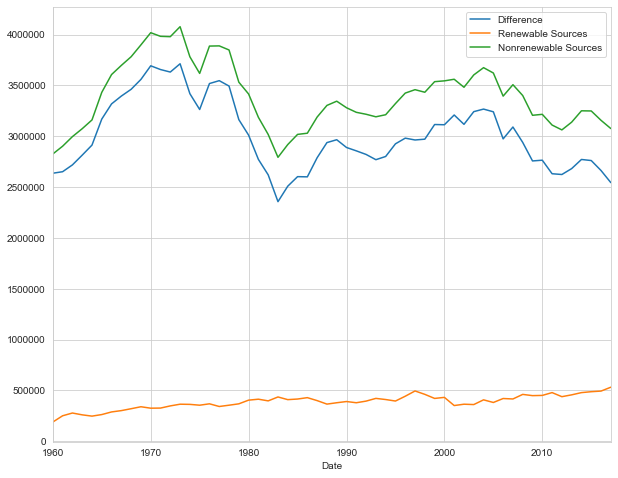

In [29]:
dataframes['Total All Sectors'][['Difference', 'Renewable Sources','Nonrenewable Sources']].plot(figsize=(10,8));

In [ ]:
import plotly
plotly.offline.plot(fig1, filename='nonrenewables.html')

In [10]:
e_columns = dataframes['Total All Sectors'].columns[1:14]

## Breaking down "All Sectors" by Energy Source

In [11]:
# fig = subplots.make_subplots(rows=3,cols=2)
fig1 = go.Figure()

for column in nonrenewable_sources:

    plot_df = dataframes['Total All Sectors']

    fig1.add_trace(go.Scatter(
        x=plot_df.index,        
        y=plot_df[column],           
        mode='lines',           
        name=re.findall('(\w* ?\w*)',column)[0],
#                 line_color='#6785be'
        )
    )


fig1.update_layout(
    title = 'NY Nonrenewable Energy Consumption - Total All Sectors',
    template = "plotly_white",
    xaxis_title = 'Year',
    yaxis_title = 'Energy Consumption (Billion Btu)',
    yaxis_showgrid=False,
    xaxis_showgrid=False,
    yaxis_ticks='outside',
    yaxis_tickcolor='white',
    yaxis_ticklen=10,
    yaxis_zeroline=False,
#     legend=go.layout.Legend(x=0.83,y=1.1),
    width = 1000, #1000
    height = 600  #600      
    )
fig2 = go.Figure()

for column in renewable_sources:

    plot_df = dataframes['Total All Sectors']

    fig2.add_trace(go.Scatter(
        x=plot_df.index,        
        y=plot_df[column],           
        mode='lines',           
        name=re.findall('(\w* ?\w*)',column)[0],
#                 line_color='#6785be'
        )
    )


fig2.update_layout(
    title = 'NY Renewable Energy Consumption - Total All Sectors',
    template = "plotly_white",
    xaxis_title = 'Year',
    yaxis_title = 'Energy Consumption (Billion Btu)',
    yaxis_showgrid=False,
    xaxis_showgrid=False,
    yaxis_ticks='outside',
    yaxis_tickcolor='white',
    yaxis_ticklen=10,
    yaxis_zeroline=False,
    width = 1000, #1000
    height = 600  #600      
    )

fig1.show()
fig2.show()
# filename=sector.lower().replace(' ','_')
fig1.write_image(f'figures/ny_nr_breakdown.png',scale=2)
fig2.write_image(f'figures/ny_r_breakdown.png',scale=2)
    

##  Breaking down Renewable and Nonrenewable by Sector

In [12]:
fig1 = go.Figure()

for sector in sectors:

    plot_df = dataframes[sector]

    fig1.add_trace(go.Scatter(
        x=plot_df.index,        
        y=plot_df['Nonrenewable Sources'],           
        mode='lines',           
        name=sector,
#                 line_color='#6785be'
        )
    )


fig1.update_layout(
    title = 'NY Nonrenewable Energy Consumption Across Sectors',
    template = "plotly_white",
    xaxis_title = 'Year',
    yaxis_title = 'Energy Consumption (Billion Btu)',
    yaxis_showgrid=False,
    xaxis_showgrid=False,
    yaxis_ticks='outside',
    yaxis_tickcolor='white',
    yaxis_ticklen=10,
    yaxis_zeroline=False,
#     legend=go.layout.Legend(x=0.83,y=1.1),
    width = 1000, #1000
    height = 600  #600      
    )
fig2 = go.Figure()

for sector in sectors:

    plot_df = dataframes[sector]

    fig2.add_trace(go.Scatter(
        x=plot_df.index,        
        y=plot_df['Renewable Sources'],           
        mode='lines',           
        name=sector,
#                 line_color='#6785be'
        )
    )


fig2.update_layout(
    title = 'NY Renewable Energy Consumption Across Sectors',
    template = "plotly_white",
    xaxis_title = 'Year',
    yaxis_title = 'Energy Consumption (Billion Btu)',
    yaxis_showgrid=False,
    xaxis_showgrid=False,
    yaxis_ticks='outside',
    yaxis_tickcolor='white',
    yaxis_ticklen=10,
    yaxis_zeroline=False,
    width = 1000, #1000
    height = 600  #600      
    )

fig1.show()
fig2.show()
# filename=sector.lower().replace(' ','_')
# fig1.write_image(f'figures/ny_nr_breakdown.png',scale=2)
# fig2.write_image(f'figures/ny_r_breakdown.png',scale=2)a

In [956]:
import plotly
plotly.offline.plot(fig1, filename='nonrenewables.html')

'nonrenewables.html'

# Visualize NY Nonrenewable Energy Consumption Across Decades - All Sectors

In [563]:
total_df = dataframes['Total All Sectors']

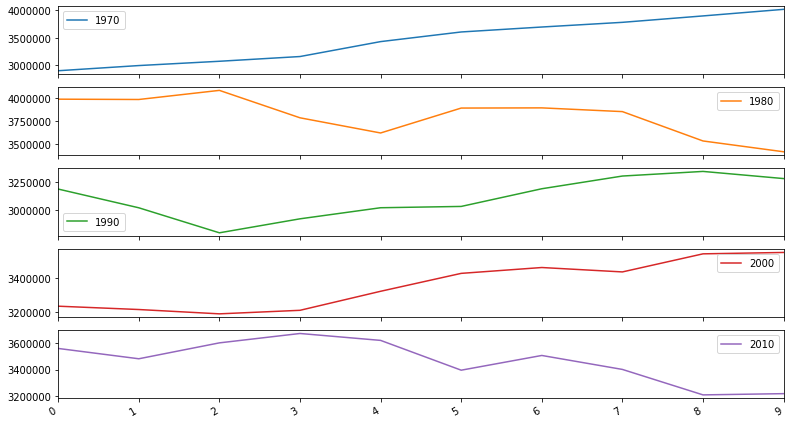

In [469]:
# Use pandas grouper to group values using annual frequency
nr_decade_groups = total_df['Nonrenewable Sources'].groupby(pd.Grouper(freq ='10Y'))

# Create a new DataFrame and store yearly values in columns 
nr_total_decades = pd.DataFrame()

for yr, group in nr_decade_groups:
    if yr.year > 1960 and yr.year < 2011:
        nr_total_decades[yr.year] = group.values
        

# Visualize NY Renewable Energy Consumption Across Decades - All Sectors

In [471]:
decades_melt = nr_total_decades.reset_index().melt(id_vars = 'index',
                                  value_vars = nr_total_decades.columns,
                                  var_name = 'Decade',
                                  value_name = 'Energy Consumed (Billion Btu)')

decades_melt.columns = ['Year Within Decade', 'Decade', 'Energy Consumed (Billion Btu)'] 

fig = px.line(decades_melt,
              x = decades_melt['Year Within Decade'],
              y = decades_mel['Energy Consumed (Billion Btu)'],
              color = 'Decade',
              title = 'New York Nonrenewable Energy Consumption - Total All Sectors')
fig

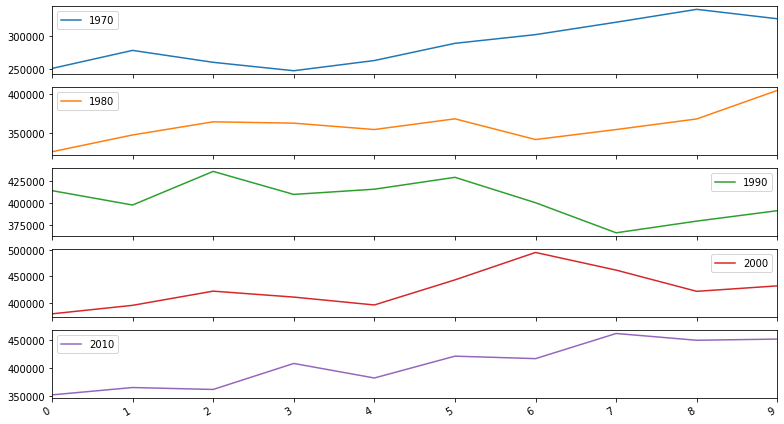

In [500]:
# Use pandas grouper to group values using annual frequency
r_decade_groups = total_df['Renewable Sources'].groupby(pd.Grouper(freq ='10Y'))

# Create a new DataFrame and store yearly values in columns 
r_total_decades = pd.DataFrame()

for yr, group in r_decade_groups:
    if yr.year > 1960 and yr.year < 2011:
        r_total_decades[yr.year] = group.values
        

# Plot the yearly groups as subplots
r_total_decades.plot(figsize = (13,8), subplots=True);

In [501]:
r_decades_melt = r_total_decades.reset_index().melt(id_vars = 'index',
                                  value_vars = r_total_decades.columns,
                                  var_name = 'Decade',
                                  value_name = 'Energy Consumed (Billion Btu)')

r_decades_melt.columns = ['Year Within Decade', 'Decade', 'Energy Consumed (Billion Btu)'] 

fig = px.line(r_decades_melt,
              x = 'Year Within Decade',
              y = 'Energy Consumed (Billion Btu)',
              color = 'Decade',
              title = 'New York Renewable Energy Consumption - Total All Sectors')
fig

# Visualize NY Temperature Data

In [1287]:
fig = go.Figure()

for column in temp_df.columns[3:-14]:

    fig.add_trace(go.Scatter(
        x=temp_df.index,        
        y=temp_df[column],           
        mode='lines',           
        name=column.title().replace('_',' ')+'F',
#         line_color='#6785be'
        )
    )
    
fig.update_layout(
    title = 'NY Temperature Trends',
    template = "plotly_white",
    xaxis_title = 'Year',
    yaxis_title = 'No. of Days per Year',
    yaxis_showgrid=False,
    xaxis_showgrid=False,
    yaxis_ticks='outside',
    yaxis_tickcolor='white',
    yaxis_ticklen=10,
    yaxis_zeroline=False,
    width = 1000, 
    height = 600  #600      
    )
# fig.write_image('figures/ny_temp_trends.png',scale=2) 

In [1296]:
fig = go.Figure()

for column in temp_df.columns[-4:]:

    fig.add_trace(go.Scatter(
        x=temp_df.index,        
        y=temp_df[column],           
        mode='lines',           
        name=column.title().replace('_',' '),
#         line_color='#6785be'
        )
    )
    
fig.update_layout(
    title = 'NY Temperature Statistics',
    template = "plotly_white",
    xaxis_title = 'Year',
    yaxis_title = 'Temperature (F)',
    yaxis_showgrid=False,
    xaxis_showgrid=False,
    yaxis_ticks='outside',
    yaxis_tickcolor='white',
    yaxis_ticklen=10,
    yaxis_zeroline=False,
    width = 1000, 
    height = 600  #600      
    )

# fig.write_image('figures/ny_temp_stats.png',scale=2) 

# Histograms

Using to show that due to the nature of linear statistical modeling and time series, we can only select data with normally distributed variables. We thus should only focus predictions for each state on renewable vs. nonrenewable energy in **Total All Sectors**. 

In [962]:
for sector in sectors:
    plot_df = dataframes[sector]
    
    fig = go.Figure()
    
    fig.add_trace(go.Histogram(
        x=plot_df['Renewable Sources'],
        name='Renewable',
        histnorm='probability'),
        )
    
    fig.add_trace(go.Histogram(
        x=plot_df['Nonrenewable Sources'],
        name='Nonrenewable',
        histnorm='probability')
        )
    
    fig.update_layout(height=500, 
                      width=1000, 
                      template = "plotly_white",
                      title = sector,
                      xaxis_title='Energy Consumption (Billion Btu)',
                      barmode='overlay'
                      )
    fig.update_traces(opacity=0.75)
    
    fig.show()
    filename=sector.lower().replace(' ','_')
#     fig.write_image(f'figures/ny_{filename}_hist.png',scale=2)
    


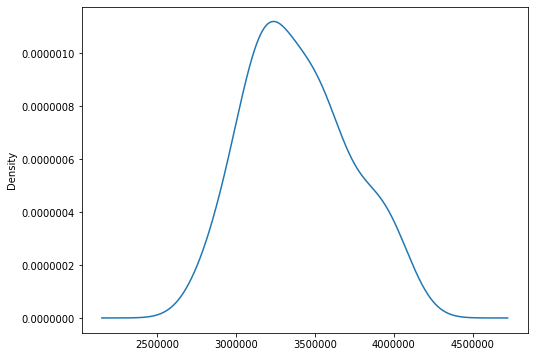

In [524]:
total_df['Nonrenewable Sources'].plot(kind='kde', figsize = (8,6));

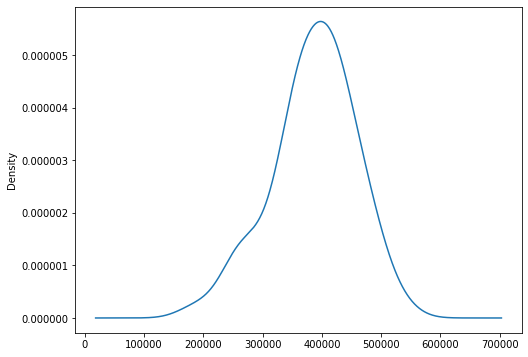

In [525]:
total_df['Renewable Sources'].plot(kind='kde', figsize = (8,6));

In [855]:
exo_columns = list(total_df.columns[17:26]) + list(total_df.columns[-4:])

In [856]:
exo_columns

['days_above_85',
 'days_above_80',
 'days_above_75',
 'days_above_70',
 'days_below_70',
 'days_below_65',
 'days_below_60',
 'days_below_55',
 'days_below_50',
 'Max Temp',
 'Min Temp',
 'Mean Temp',
 'Std Temp']

In [872]:
fig = subplots.make_subplots(rows=3,
                             cols=5,
                             subplot_titles=[column.replace('_',' ').title() for column in  exo_columns],
                            shared_yaxes=True)

fig.update_layout(height=800, 
                      width=1400, 
                      template = "plotly_white",
                      title = 'Temperature Frequency Distributions',
                      )

for index in range(len(exo_columns)):
    
    if index > 8:
        xaxis_label = 'Temperature (F)'
    else:
        xaxis_label = 'No. of Days per Year'
    
    row = (index // 5) + 1
    col = index % 5 + 1
    
#     print(index, row, col)
    
    fig.add_trace(go.Histogram(
        
        x=temp_df[exo_columns[index]],
        showlegend=False,
        marker_color='#3c19f0'),
        col=col,row=row,
        )

    # Update xaxis properties
    fig.update_xaxes(title_text=xaxis_label, 
                     showgrid=False, 
                     zeroline=False,ticks='outside',
                      tickcolor='white',
                      ticklen=10,
                     row=row, col=col)

    # Update yaxis properties
    
    fig.update_yaxes(showgrid=False,
                     zeroline=False,ticks='outside',
                      tickcolor='white',
                      ticklen=10, 
                     row=row, col=col)
    if col == 1:
        fig.update_yaxes(title_text='Frequency',row=row, col=col)
    
fig.show()
filename=sector.lower().replace(' ','_')
fig.write_image('figures/ny_temp_hists.png',scale=2)

In [901]:
fig = subplots.make_subplots(cols=2,
                           subplot_titles=['NY Population','NY Population Frequency Distribution'])

fig.add_trace(go.Scatter(
    x=total_df.index,
    y=total_df['Population'],
    showlegend=False),
         row=1,col=1
                        )
fig.add_trace(go.Histogram(
    x=total_df['Population'],
    nbinsx=18,
    showlegend=False),
                      row=1,col=2)

fig.update_layout(
    width = 1300, #1000
    height = 500  #600  
              )

# Update xaxis properties
fig.update_xaxes(title_text='Year', 
                 showgrid=False, 
                 zeroline=False,ticks='outside',
                  tickcolor='white',
                  ticklen=10,
                 row=1, col=1)
fig.update_xaxes(title_text='Population', 
                 showgrid=False, 
                 zeroline=False,ticks='outside',
                  tickcolor='white',
                  ticklen=10,
                row=1, col=2)
# Update yaxis properties

fig.update_yaxes(showgrid=False,
                 zeroline=False,ticks='outside',
                  tickcolor='white',
                  ticklen=10, 
                 row=1, col=1)


fig.update_yaxes(showgrid=False,
                 zeroline=False,ticks='outside',
                  tickcolor='white',
                  ticklen=10, 
                 row=1, col=2)
   
        
fig.show()
fig.write_image('figures/ny_pop_fig.png',scale=2)

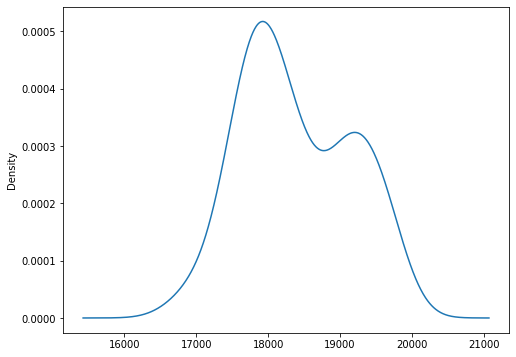

In [593]:
total_df['Population'].plot(kind='kde', figsize = (8,6));

In [824]:
2%4

2

In [859]:
temp_df.columns

Index(['days_above_100', 'days_above_95', 'days_above_90', 'days_above_85',
       'days_above_80', 'days_above_75', 'days_above_70', 'days_below_70',
       'days_below_65', 'days_below_60', 'days_below_55', 'days_below_50',
       'days_below_45', 'days_below_40', 'days_below_35', 'days_below_30',
       'days_below_25', 'days_below_20', 'days_below_15', 'days_below_10',
       'days_below_5', 'Max Temp', 'Min Temp', 'Mean Temp', 'Std Temp'],
      dtype='object')

For the most part, none of these variables are normally distributed. Population seems to be bivariate interestingly. So maybe that will not be such a great predictor in the final model.

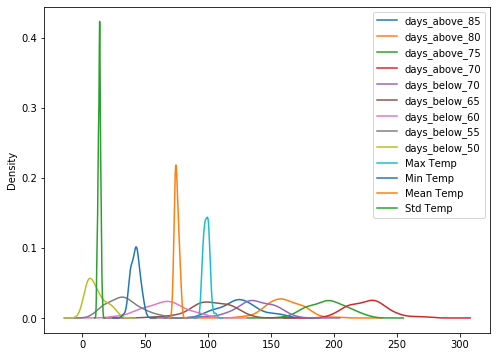

In [592]:
total_df[exo_columns[1:]].plot(kind='kde', figsize = (8,6));

# Summarize Findings So Far

1. New York nonrenewable energy consumption is/has much been much greater than its renewable counterpart throughout history
2. It appears that the trend over the last 20 years is that nonrenewable consumption is decreasing, while renewable consumption is increasing - many factors likely involving awareness of climate change, legislation, decreasing prices of renewable energy sources.
3. Histograms/KDE plots of energy consumption show that of all sectors, only the aggregated sector of "Total All Sectors" exhibits normally distributed energy consumption across renewable and nonrenewable energy. We'll therefore limit the scope of any forecasting to "Total All Sectors" for any state moving forward.
4. Histograms/KDE plots of exogenous variables show that pretty much all temperature designations exhibit normal, or mostly normal frequency distributions. Thus, all of these are fair game for the model.
5. Histogram/KDE plot of population reveals a bivariate distribution, which may be an issue going forward.

I dont think any logarithmic transformations will help here, but scaling will be necessary before training a model.

# Testing Stationarity

In [35]:
r_ts = dataframes['Total All Sectors']['Renewable Sources']
nr_ts = dataframes['Total All Sectors']['Nonrenewable Sources']

r_roll_mean = r_ts.rolling(window=6, center=False).mean()
r_roll_std = r_ts.rolling(window=6, center=False).std()

nr_roll_mean = nr_ts.rolling(window=6, center=False).mean()
nr_roll_std = nr_ts.rolling(window=6, center=False).std()

In [869]:
# Create traces
fig = subplots.make_subplots(rows = 2, 
                             cols = 1,
                             vertical_spacing = 0.15,
                             subplot_titles = ['NY Renewable Energy Consumption Rolling Mean & Standard Deviation', 
                                               'NY Nonrenewable Energy Consumption Rolling Mean & Standard Deviation'])

fig.add_trace(go.Scatter(x=dates[::-1], 
                         y=r_ts,
                         mode='lines',
                         name='Original',
#                          legendgroup = 'r',
                         line_color='#f8432d'
                         ), 
              row = 1,
              col = 1,
             )

fig.add_trace(go.Scatter(x=dates[::-1], 
                         y=r_roll_mean,
                         mode='lines',
                         name='Rolling Mean',
#                          legendgroup = 'r',
                         line_color='#6785be'
                        ),
              row = 1,
              col = 1)

fig.add_trace(go.Scatter(x=dates[::-1], 
                         y=r_roll_std,
                         mode='lines', 
                         name='Rolling Std',
#                          legendgroup = 'r',
                         line_color='rgb(150,150,150)'
                        ),
              row = 1, 
              col = 1)


fig.add_trace(go.Scatter(x=dates[::-1], 
                         y=nr_ts,
                         mode='lines',
                         name='Original',
                         showlegend=False,
                         line_color='#f8432d'),
              row = 2,
              col = 1)

fig.add_trace(go.Scatter(x=dates[::-1], 
                         y=nr_roll_mean,
                         mode='lines',
                         name='Rolling Mean',
                         showlegend=False,
                         line_color='#6785be'),
              row = 2,
              col = 1)

fig.add_trace(go.Scatter(x=dates[::-1], 
                         y=nr_roll_std,
                         mode='lines',
                         name='Rolling Std',
                         showlegend=False,
                         line_color='rgb(150,150,150)'),
              row = 2,
              col = 1)

fig.update_layout(height=800, 
                  width=1000, 
                  template = "plotly_white",
                  )


# Update xaxis properties
fig.update_xaxes(title_text='Year', 
                 showgrid=False, 
                 zeroline=False, 
#                  ticks='outside',
#                  tickcolor='white',
#                  ticklen=10, 
                 row=1, col=1)

fig.update_xaxes(title_text='Year', 
                 showgrid=False, 
                 zeroline=False, 
#                  ticks='outside',
#                  tickcolor='white',
#                  ticklen=10, 
                 row=2, col=1)


# Update yaxis properties
fig.update_yaxes(title_text='Energy Consumption (Billion Btu)', 
                 showgrid=False,
                 ticks='outside',
                 tickcolor='white',
                 ticklen=10,
                 zeroline=False, row=1, col=1)
fig.update_yaxes(title_text='Energy Consumption (Billion Btu)', 
                 showgrid=False,
                 ticks='outside',
                 tickcolor='white',
                 ticklen=10,
                 zeroline=False, 
                 row=2, col=1)


fig.show()

In [870]:
import os

if not os.path.exists("figures"):
    os.mkdir("figures")
    
fig.write_image("figures/rolling_stats.png",scale=2)

#### The rolling means for both of the above graphs are not constant over time, indicating that our series are not stationary. Below is a Dickey-Fuller test to confirm with statistical confidence.

In [991]:
def dickey_fuller_comparison(series_1_data, series_2_data, series_1_name, series_2_name):
    """
    Returns a df with dickey fuller results for both the renewable and nonrenewable time series.
    
    Param series_1_data: [pd.Series] time series of renewable energy
    Param series_2_data: [pd.Series] time series of nonrenewable energy
    
    Param series_1_name: [str] name of series_1_data
    Param series_2_name: [str] name of series_2_data
    """

    dftest_1 = adfuller(series_1_data)
    dfoutput_1 = pd.Series(dftest_1[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest_1[4].items():
        dfoutput_1['Critical Value (%s)'%key] = value

    dftest_2 = adfuller(series_2_data)
    dfoutput_2 = pd.Series(dftest_2[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest_2[4].items():
        dfoutput_2['Critical Value (%s)'%key] = value

    df_results = pd.concat([dfoutput_1, dfoutput_2],axis=1)
    df_results.columns = [series_1_name, series_2_name]
    
    return df_results

In [993]:
dickey_fuller_comparison(r_ts, nr_ts, 'Renewable Sources', 'Nonrenewable Sources')

Renewable Sources  Nonrenewable Sources
Test Statistic                       -0.378808             -2.296522
p-value                               0.913577              0.173092
#Lags Used                           11.000000              1.000000
Number of Observations Used          46.000000             56.000000
Critical Value (1%)                  -3.581258             -3.552928
Critical Value (5%)                  -2.926785             -2.914731
Critical Value (10%)                 -2.601541             -2.595137

Using 1% critical value, we find that both test statistics are greater than the critical value and thus fail to reject the null hypothesis. Therefore, both time series exhibit non-stationary behavior.

## Removing Trends

In [1008]:
def plot_trend(series,title):
    

    # Create traces
    fig = go.Figure()

    # fig.add_trace(go.Scatter(x=dates[::-1], 
    #                          y=r_ts,
    #                          mode='lines',
    #                          name='Original',
    # #                          legendgroup = 'r',
    #                          line_color='#f8432d'
    #                          )
    #              )

    # fig.add_trace(go.Scatter(x=dates[::-1], 
    #                          y=r_roll_mean,
    #                          mode='lines',
    #                          name='Rolling Mean',
    # #                          legendgroup = 'r',
    #                          line_color='#6785be'
    #                         )
    #              )

    fig.add_trace(go.Scatter(x=dates[::-1], 
                             y=series,
                             mode='lines', 
                             name='Original Minus Rolling Mean',
    #                          legendgroup = 'r',
                             line_color='rgb(150,150,150)'
                            )
                 )



    fig.update_layout(height=600, 
                      width=800, 
                      template = "plotly_white",
                      title=title
                      )


    # Update xaxis properties
    fig.update_xaxes(title_text='Year', 
                     showgrid=False, 
                     zeroline=False, 
    #                  ticks='outside',
    #                  tickcolor='white',
    #                  ticklen=10, 
                     )



    # Update yaxis properties
    fig.update_yaxes(title_text='Energy Consumption (Billion Btu)', 
                     showgrid=False,
                     ticks='outside',
                     tickcolor='white',
                     ticklen=10,
                     zeroline=False)
    
    fig.show()


In [1177]:
fig = go.Figure()
for i in range(2,11):
    roll_mean = r_ts.rolling(window=i, center=False).mean()

    fig.add_trace(go.Scatter(x=dates[::-1], 
                             y=(r_ts-roll_mean).dropna(),
                             mode='lines', 
                             name=f'Window = {i}',
                            )
                 )

fig.update_layout(height=600, 
                  width=800, 
                  template = "plotly_white",
                  title='Comparing Rolling Mean Windows'
                  )

# Update xaxis properties
fig.update_xaxes(title_text='Year', 
                 showgrid=False, 
                 zeroline=False,
                ) 

# Update yaxis properties
fig.update_yaxes(title_text='Energy Consumption (Billion Btu)', 
                 showgrid=False,
                 ticks='outside',
                 tickcolor='white',
                 ticklen=10,
                 zeroline=False)
    
fig.show()
    

By comparing window = 2 to window = 10 we see that smaller windows tend to have more even amplitude in signal. In particular, I'm looking to minimize the difference in the huge up/down peak around 1987-1995 in window=10. We see that this feature appears around 1993-2002 in window=2 but is much less pronounced. Window=2 may ideal.

I'll now run dickey-fuller tests to confirm.

In [1183]:
print('Window ', 'Test Stat ', 'P Value   ','Critical Value (1%) ','Test Stat < Tcrit   \n')
for i in range(2,11):
    roll_mean = r_ts.rolling(window=i, center=False).mean()
    results = dickey_fuller_comparison(r_ts,(r_ts - roll_mean).dropna(),'Renewable Sources','Results')
    
    print(i, '  ',
          round(results['Results'][0],4),'  ',
          round(results['Results'][1],4), '  ',
          round(results['Results'][4],4), '  ',
          results['Results'][0] < results['Results'][4])

Window  Test Stat  P Value    Critical Value (1%)  Test Stat < Tcrit   

2    -2.3559    0.1546    -3.5813    False
3    -1.75    0.4056    -3.5848    False
4    -3.9351    0.0018    -3.5778    True
5    -3.7053    0.004    -3.5602    True
6    -1.4648    0.5508    -3.601    False
7    -4.3915    0.0003    -3.5778    True
8    -4.0756    0.0011    -3.5813    True
9    -3.9117    0.002    -3.5848    True
10    -3.0927    0.0271    -3.5746    False


The lowest window with passing test statistic is window = 4.

In [1217]:
dickey_fuller_comparison(r_ts,r_ts.diff(1).dropna(),'Renewable Sources','First Difference')

Renewable Sources  First Difference
Test Statistic                       -0.378808         -2.355927
p-value                               0.913577          0.154564
#Lags Used                           11.000000         10.000000
Number of Observations Used          46.000000         46.000000
Critical Value (1%)                  -3.581258         -3.581258
Critical Value (5%)                  -2.926785         -2.926785
Critical Value (10%)                 -2.601541         -2.601541

Turns out taking the first difference is also somewhat effective, but does not pass the dickey-fuller test.

## Correlation

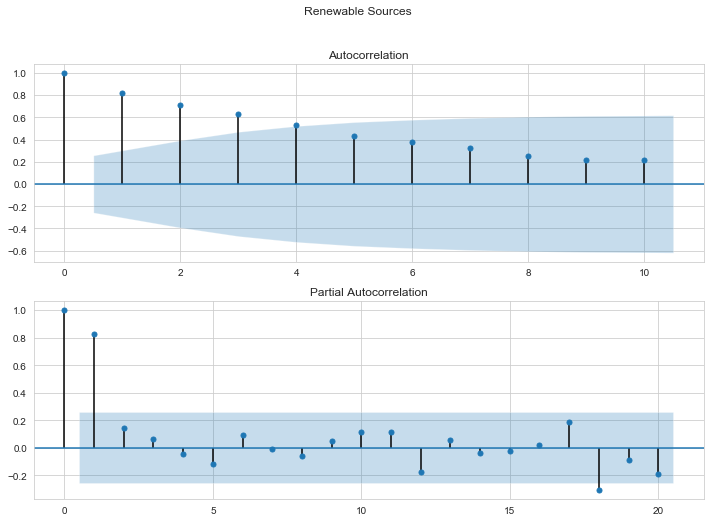

In [1146]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Renewable Sources')
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(r_ts, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(r_ts, lags=20, ax=ax2)

First several values of ACF show high correlation, meaning we shoulk take a first difference.

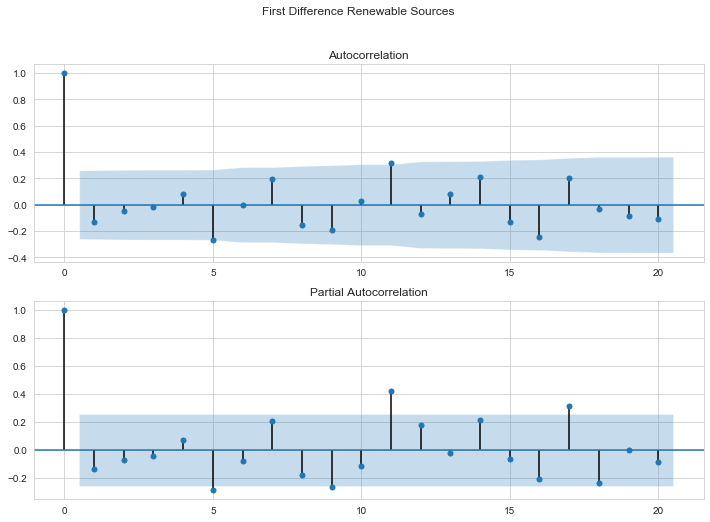

In [1148]:
r_ts_diff = r_ts.diff(1).dropna()

fig = plt.figure(figsize=(12,8))

fig.suptitle('First Difference Renewable Sources')

ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(r_ts_diff, lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(r_ts_diff, lags=20, ax=ax2)

Lack of correlation here supports claim of no seasonality but also indicates no AR or MA terms are necessary. ARIMA probably will not well model this data. This is likley due to the fact that there are only 56 available data points. Most of the interesting seasonality probably occurs at the monthly level, which I do not have at my disposal.

# Univariate Modeling

To get a baseline idea of how well we can model the data using ARIMA or some combination of AR/MA, we will model the data using just the energy data

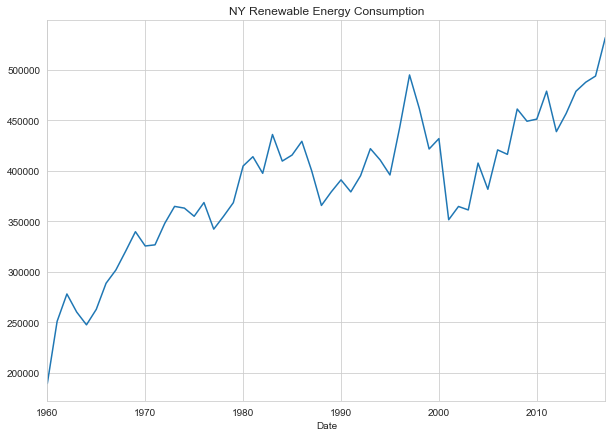

In [1209]:
r_ts.plot(figsize=(10,7),title='NY Renewable Energy Consumption')

In [1218]:
r_train = r_ts[:-10]
r_test = r_ts[-10:]

In [1219]:
from pmdarima import auto_arima

In [1220]:
auto_arima(r_ts,
           seasonal=False,
           stationary=False,
           m=1).summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   58
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -661.752
Date:                Thu, 16 Jan 2020   AIC                           1327.503
Time:                        17:02:50   BIC                           1331.589
Sample:                             0   HQIC                          1329.091
                                 - 58                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6009.5965   3709.877      1.620      0.105   -1261.628    1.33e+04
sigma2      7.105e+08   1.23e+08      5.759      0.000    4.69e+08    9.52e+08
===================================================================================
Ljung-Box (Q):                       68.47   Jarque-Bera (JB):                 3.08
Prob(Q):                              0.00   Prob(JB):                         0.21
Heteroskedasticity (H):               2.58   Skew:                            -0.49
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [1221]:
r_model = sm.tsa.statespace.SARIMAX(r_train,
                                order=(0,1,0),
                            )
results = r_model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:      Renewable Sources   No. Observations:                   48
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -547.193
Date:                Thu, 16 Jan 2020   AIC                           1096.386
Time:                        17:02:52   BIC                           1098.236
Sample:                    01-01-1960   HQIC                          1097.082
                         - 01-01-2007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.426e+08    1.4e+08      5.305      0.000    4.68e+08    1.02e+09
Ljung-Box (Q):                       55.98   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.05   Pr

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



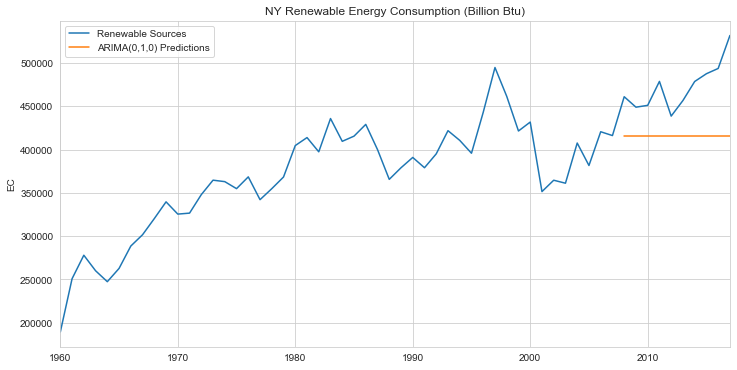

In [1224]:
start=len(r_train)
end=len(r_train)+len(r_test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('ARIMA(0,1,0) Predictions')

# Plot predictions against known values
title = 'NY Renewable Energy Consumption (Billion Btu)'
ylabel='EC'
xlabel=''

ax = r_ts.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Predicts a straight line because no AR or MA terms. Let's revisit the rolling window = 4 option.

## Revisiting Rolling Window = 2

In [1228]:
roll_mean_2 = r_ts.rolling(window=4, center=False).mean()
r_ts_roll = (r_ts - roll_mean_2).dropna()

dickey_fuller_comparison(r_ts,r_ts_roll,'Renewable Sources','Rolling Window Difference W=4')

Renewable Sources  Rolling Window Difference W=4
Test Statistic                       -0.378808                      -3.935107
p-value                               0.913577                       0.001791
#Lags Used                           11.000000                       7.000000
Number of Observations Used          46.000000                      47.000000
Critical Value (1%)                  -3.581258                      -3.577848
Critical Value (5%)                  -2.926785                      -2.925338
Critical Value (10%)                 -2.601541                      -2.600774

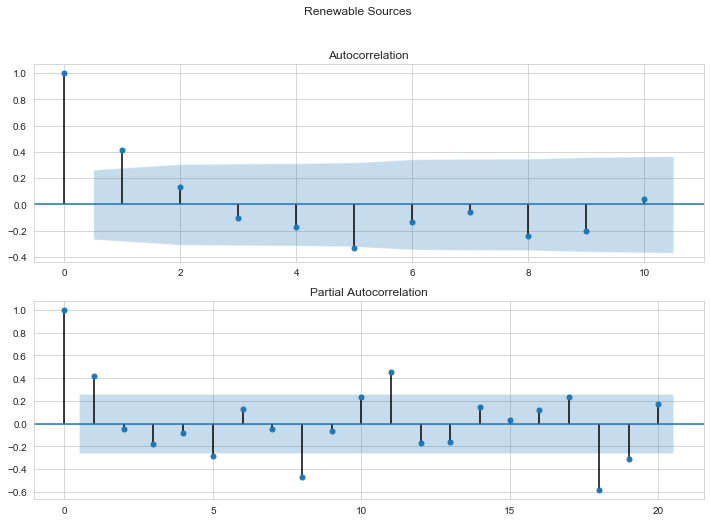

In [1229]:
fig = plt.figure(figsize=(12,8))
fig.suptitle('Renewable Sources')
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(r_ts_roll, lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(r_ts_roll, lags=20, ax=ax2)

strong corr at lag = 1 suggests AR or MA term.

In [1230]:
auto_arima(r_ts_roll,
           seasonal=False,
           stationary=True,
           m=1).summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   55
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -617.949
Date:                Thu, 16 Jan 2020   AIC                           1247.897
Time:                        17:08:30   BIC                           1259.941
Sample:                             0   HQIC                          1252.555
                                 - 55                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4601.6314   4692.607      0.981      0.327   -4595.709    1.38e+04
ar.L1          0.7676      0.206      3.727      0.000       0.364       1.171
ar.L2         -0.7096      0.145     -4.895      0.000      -0.994      -0.425
ma.L1         -0.5107      0.168     -3.043      0.002      -0.840      -0.182
ma.L2          0.9563      0.218      4.386      0.000       0.529       1.384
sigma2      3.976e+08      0.016   2.42e+10      0.000    3.98e+08    3.98e+08
===================================================================================
Ljung-Box (Q):                       59.82   Jarque-Bera (JB):                 3.87
Prob(Q):                              0.02   Prob(JB):                         0.14
Heteroskedasticity (H):               1.79   Skew:                            -0.43
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.86e+26. Standard errors may be unstable.
"""

In [1256]:
r_train = r_ts_roll[:-6]
r_test = r_ts_roll[-6:]

In [1257]:
r_model = sm.tsa.statespace.SARIMAX(r_train,
                                order=(2,0,2),
                            )
results = r_model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:      Renewable Sources   No. Observations:                   49
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -553.494
Date:                Thu, 16 Jan 2020   AIC                           1116.988
Time:                        17:15:17   BIC                           1126.447
Sample:                    01-01-1963   HQIC                          1120.576
                         - 01-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6860      0.456     -1.503      0.133      -1.581       0.209
ar.L2         -0.0973      0.390     -0.249      0.803      -0.862       0.668
ma.L1          1.2577      0.303      4.147      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



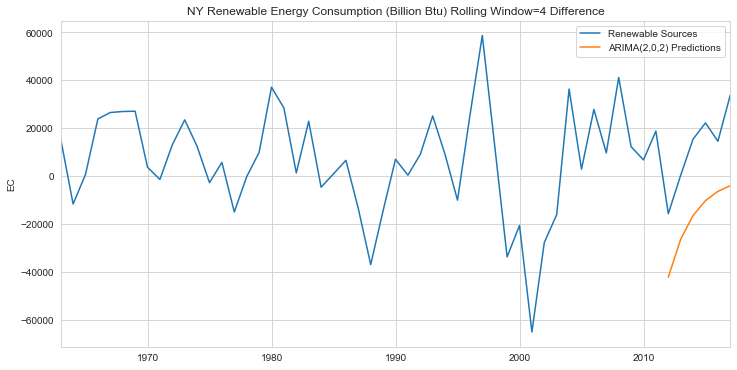

In [1285]:
start=len(r_train)
end=len(r_train)+len(r_test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('ARIMA(2,0,2) Predictions')

# Plot predictions against known values
title = 'NY Renewable Energy Consumption (Billion Btu) Rolling Window=4 Difference'
ylabel='EC'
xlabel=''

ax = r_ts_roll.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Again, not great

# Try Whole Process Again for NR

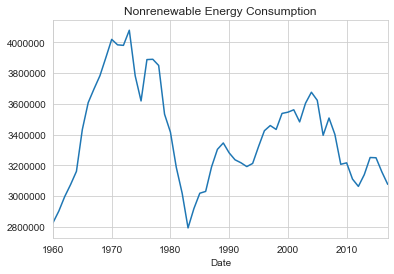

In [1262]:
nr_ts.plot(title='Nonrenewable Energy Consumption');

This probably will not go well either

In [1259]:
print('Window ', 'Test Stat ', 'P Value   ','Critical Value (1%) ','Test Stat < Tcrit   \n')
for i in range(2,11):
    roll_mean = nr_ts.rolling(window=i, center=False).mean()
    results = dickey_fuller_comparison(nr_ts,(nr_ts - roll_mean).dropna(),'Renewable Sources','Results')
    
    print(i, '  ',
          round(results['Results'][0],4),'  ',
          round(results['Results'][1],4), '  ',
          round(results['Results'][4],4), '  ',
          results['Results'][0] < results['Results'][4])

Window  Test Stat  P Value    Critical Value (1%)  Test Stat < Tcrit   

2    -5.261    0.0    -3.5529    True
3    -3.4017    0.0109    -3.5656    False
4    -3.2928    0.0152    -3.5602    False
5    -3.2817    0.0157    -3.5629    False
6    -3.1526    0.0229    -3.5656    False
7    -3.2543    0.017    -3.6056    False
8    -3.5208    0.0075    -3.6104    False
9    -2.7209    0.0705    -3.5886    False
10    -1.9899    0.291    -3.5925    False


window=2 is suitable. Let's see the full comparison below

In [1263]:
roll_mean_2 = nr_ts.rolling(window=4, center=False).mean()
nr_ts_roll = (nr_ts - roll_mean_2).dropna()

dickey_fuller_comparison(nr_ts,nr_ts_roll,'Nonrenewable Sources','Rolling Window Difference W=4')

Nonrenewable Sources  \
Test Statistic                          -2.296522   
p-value                                  0.173092   
#Lags Used                               1.000000   
Number of Observations Used             56.000000   
Critical Value (1%)                     -3.552928   
Critical Value (5%)                     -2.914731   
Critical Value (10%)                    -2.595137   

                             Rolling Window Difference W=4  
Test Statistic                                   -3.292795  
p-value                                           0.015204  
#Lags Used                                        1.000000  
Number of Observations Used                      53.000000  
Critical Value (1%)                              -3.560242  
Critical Value (5%)                              -2.917850  
Critical Value (10%)                             -2.596796

In [1278]:
auto_arima(nr_train,
           seasonal=False,
           stationary=True,
           m=1).summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -619.116
Date:                Thu, 16 Jan 2020   AIC                           1246.233
Time:                        17:23:19   BIC                           1253.717
Sample:                             0   HQIC                          1249.061
                                 - 48                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -5081.1261   1.76e+04     -0.289      0.772   -3.95e+04    2.94e+04
ar.L1          0.6245      0.129      4.851      0.000       0.372       0.877
ma.L1          0.2943      0.203      1.449      0.147      -0.104       0.693
sigma2      8.864e+09      0.070   1.27e+11      0.000    8.86e+09    8.86e+09
===================================================================================
Ljung-Box (Q):                       43.33   Jarque-Bera (JB):                 3.64
Prob(Q):                              0.33   Prob(JB):                         0.16
Heteroskedasticity (H):               0.62   Skew:                            -0.50
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.23e+26. Standard errors may be unstable.
"""

In [1279]:
nr_train = nr_ts_roll[:-7]
nr_test = nr_ts_roll[-7:]

In [1280]:
nr_model = sm.tsa.statespace.SARIMAX(nr_train,
                                order=(1,0,1),
                            )
results = nr_model.fit()
print(results.summary())

                            Statespace Model Results                            
Dep. Variable:     Nonrenewable Sources   No. Observations:                   48
Model:                 SARIMAX(1, 0, 1)   Log Likelihood                -618.999
Date:                  Thu, 16 Jan 2020   AIC                           1243.998
Time:                          17:23:22   BIC                           1249.612
Sample:                      01-01-1963   HQIC                          1246.120
                           - 01-01-2010                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6237      0.124      5.035      0.000       0.381       0.867
ma.L1          0.2926      0.203      1.443      0.149      -0.105       0.690
sigma2      8.907e+09    2.4e-12   3

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



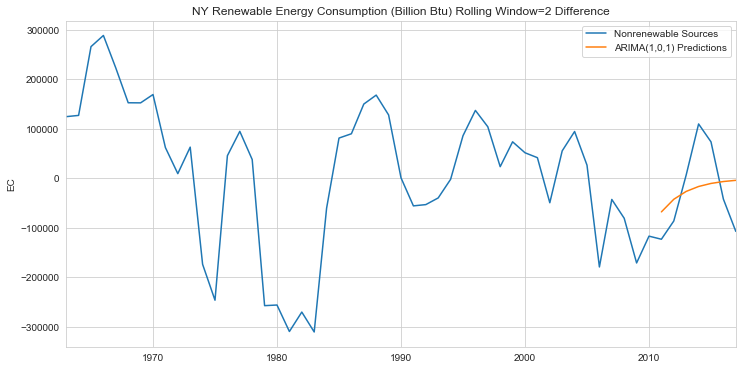

In [1284]:
start=len(nr_train)
end=len(nr_train)+len(nr_test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('ARIMA(1,0,1) Predictions')

# Plot predictions against known values
title = 'NY Renewable Energy Consumption (Billion Btu) Rolling Window=2 Difference'
ylabel='EC'
xlabel=''

ax = nr_ts_roll.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# Multivariate Modeling

In [1290]:
df = dataframes['Total All Sectors']

In [1291]:
df.columns

Index(['Population', 'Natural Gas including Supplemental Gaseous Fuels',
       'Renewable Energy', 'Biomass', 'Solar Energy', 'Wind Energy',
       'Geothermal', 'Hydroelectricity', 'All Petroleum Products', 'Coal',
       'Nuclear Power', 'Fuel Ethanol excluding Denaturant',
       'Renewable Sources', 'Nonrenewable Sources', 'days_above_100',
       'days_above_95', 'days_above_90', 'days_above_85', 'days_above_80',
       'days_above_75', 'days_above_70', 'days_below_70', 'days_below_65',
       'days_below_60', 'days_below_55', 'days_below_50', 'days_below_45',
       'days_below_40', 'days_below_35', 'days_below_30', 'days_below_25',
       'days_below_20', 'days_below_15', 'days_below_10', 'days_below_5',
       'Max Temp', 'Min Temp', 'Mean Temp', 'Std Temp'],
      dtype='object')

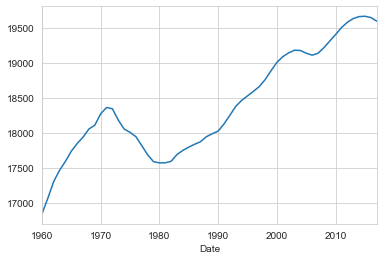

In [1294]:
df.Population.plot()


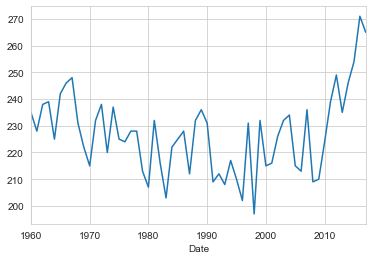

In [1295]:
df.days_above_70.plot()

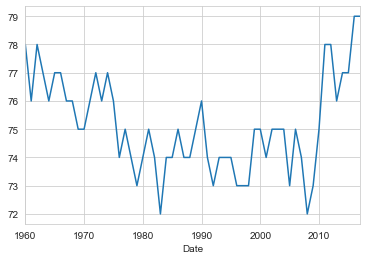

In [1297]:
df['Mean Temp'].plot()

In [1313]:
r_train = r_ts_roll[:-6]
r_test = r_ts_roll[-6:]
exog_train = df[['Population','Mean Temp']].iloc[3:-6,:]
exog_test = df[['Population','Mean Temp']].iloc[-6:,:]

In [1309]:
auto_arima(r_train,
           exogenous=exog_train,
           seasonal=False,
           stationary=False,
           m=1).summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -551.950
Date:                Thu, 16 Jan 2020   AIC                           1117.899
Time:                        17:52:43   BIC                           1131.142
Sample:                    01-01-1963   HQIC                          1122.923
                         - 01-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    342.6036   3.89e+04      0.009      0.993   -7.59e+04    7.66e+04
Population    -0.8356      6.743     -0.124      0.901     -14.052      12.381
Mean Temp    244.2574   2810.505      0.087      0.931   -5264.232    5752.747
ar.L1          1.3422      0.169      7.949      0.000       1.011       1.673
ar.L2         -0.4889      0.174     -2.804      0.005      -0.831      -0.147
ma.L1         -0.9877      0.295     -3.346      0.001      -1.566      -0.409
sigma2      3.853e+08      4.323   8.91e+07      0.000    3.85e+08    3.85e+08
===================================================================================
Ljung-Box (Q):                       38.36   Jarque-Bera (JB):                 3.25
Prob(Q):                              0.54   Prob(JB):                         0.20
Heteroskedasticity (H):               4.28   Skew:                            -0.48
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.67e+24. Standard errors may be unstable.
"""

In [1310]:
r_model = sm.tsa.statespace.SARIMAX(r_train,
                                    exog=exog_train,
                                    order=(2,0,1),
                            )
results = r_model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:      Renewable Sources   No. Observations:                   49
Model:               SARIMAX(2, 0, 1)   Log Likelihood                -551.973
Date:                Thu, 16 Jan 2020   AIC                           1115.946
Time:                        17:53:00   BIC                           1127.297
Sample:                    01-01-1963   HQIC                          1120.253
                         - 01-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Population    -0.7075      5.210     -0.136      0.892     -10.919       9.504
Mean Temp    244.2558   1277.496      0.191      0.848   -2259.590    2748.102
ar.L1          1.3427      0.168      7.999      0.0

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



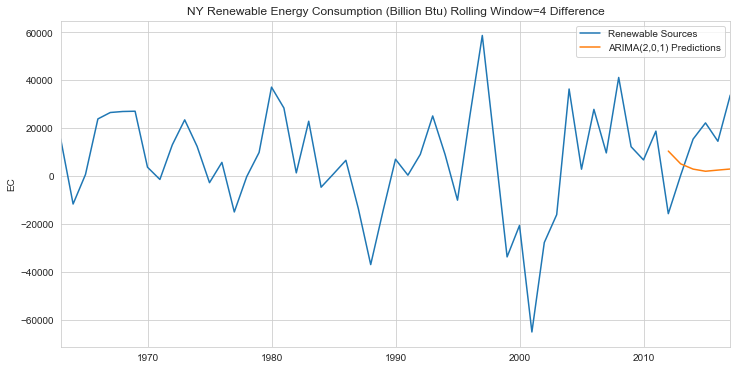

In [1315]:
start=len(r_train)
end=len(r_train)+len(r_test)-1
predictions = results.predict(start=start, end=end, dynamic=False,exog=exog_test).rename('ARIMA(2,0,1) Predictions')

# Plot predictions against known values
title = 'NY Renewable Energy Consumption (Billion Btu) Rolling Window=4 Difference'
ylabel='EC'
xlabel=''

ax = r_ts_roll.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# FB Prophet

In [30]:
!pip install pystan

     |████████████████████████████████| 39.1MB 33.7MB/s eta 0:00:01   |▏                               | 235kB 2.4MB/s eta 0:00:17     |████████████████████▉           | 25.4MB 12.2MB/s eta 0:00:02


In [31]:
!pip install fbprophet

     |████████████████████████████████| 51kB 2.8MB/s eta 0:00:01
     |████████████████████████████████| 92kB 7.8MB/s eta 0:00:011
     |████████████████████████████████| 737kB 16.6MB/s eta 0:00:01
  Created wheel for fbprophet: filename=fbprophet-0.5-cp37-none-any.whl size=680263 sha256=aa9ea9886a329abb372f69ef13381e313202bf756bd350d489e1ed56ea70cd11
  Stored in directory: /Users/Marco/Library/Caches/pip/wheels/16/61/45/2dce71b1055b65f28a8b75702664adee6c645e3e294178a202
  Created wheel for holidays: filename=holidays-0.9.12-cp37-none-any.whl size=47610 sha256=90ec0721517474d4c933f0e2c318b869e75ac523b77f71484b85c962e992833f
  Stored in directory: /Users/Marco/Library/Caches/pip/wheels/1f/fd/3a/f29866dc23dada18f25e9837477c82bbd7952aeef86fa46f11
  Created wheel for pymeeus: filename=PyMeeus-0.3.6-cp37-none-any.whl size=702822 sha256=153c91906a03ebd0a5e8b4c293957bc376aed480b5ee5d212672b4a4c15c3e63
  Stored in directory: /Users/Marco/Library/Caches/pip/wheels/d6/a7/fd/a3cc8df9eb57b13a7e893

In [32]:
#Import necessary libraries
import warnings
warnings.filterwarnings('ignore')


import pandas as pd 

# Matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from fbprophet import Prophet as proph



In [64]:
renewable_df = pd.DataFrame(r_ts)
renewable_df.reset_index(inplace=True)
renewable_df.columns = ['ds','y']

In [75]:
train_df = renewable_df.iloc[:-8,:]
test_df = renewable_df.iloc[-8:,:]

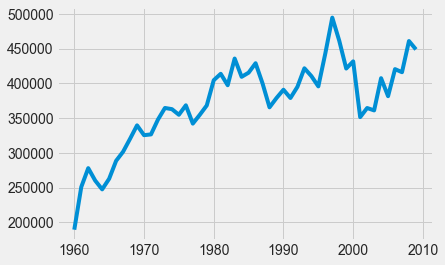

In [76]:
plt.plot(train_df.ds, train_df.y)

In [77]:
model=proph(interval_width=0.95)
model.fit(train_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [89]:
future_dates = model.make_future_dataframe(periods=15,freq='Y')

In [91]:
forecast=model.predict(future_dates)
# forecast.head()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
0 1960-01-01   84610.626881  198492.780719  315259.869623   84610.626881   
1 1961-01-01   90651.884914  213541.075174  324397.075704   90651.884914   
2 1962-01-01   96676.636777  210090.806151  325112.217739   96676.636777   
3 1963-01-01  102701.388638  216820.849968  329569.151671  102701.388638   
4 1964-01-01  108726.140504  221466.907406  334610.740230  108726.140504   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   84610.626881   171767.146751         171767.146751         171767.146751   
1   90651.884914   176371.300327         176371.300327         176371.300327   
2   96676.636777   173338.699012         173338.699012         173338.699012   
3  102701.388638   171803.083605         171803.083605         171803.083605   
4  108726.140504   171767.146751         171767.146751         171767.146751   

          yearly   yearly_lower   yearly_upper  multiplicative_terms  \
0  171767.146751  171767.146751  171767.146751                   0.0   
1  176371.300327  176371.300327  176371.300327                   0.0   
2  173338.699012  173338.699012  173338.699012                   0.0   
3  171803.083605  171803.083605  171803.083605                   0.0   
4  171767.146751  171767.146751  171767.146751                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper           yhat  
0                         0.0                         0.0  256377.773632  
1                         0.0                         0.0  267023.185242  
2                         0.0                         0.0  270015.335790  
3                         0.0                         0.0  274504.472243  
4                         0.0                         0.0  280493.287255

In [92]:
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds           yhat     yhat_lower     yhat_upper
60 2019-12-31  458223.324439  402736.545864  520104.630430
61 2020-12-31  446273.472604  388198.740020  503177.058341
62 2021-12-31  450628.662880  390078.715029  507881.655673
63 2022-12-31  456475.331508  400832.453530  515420.618613
64 2023-12-31  463805.334696  405469.566450  525183.458945

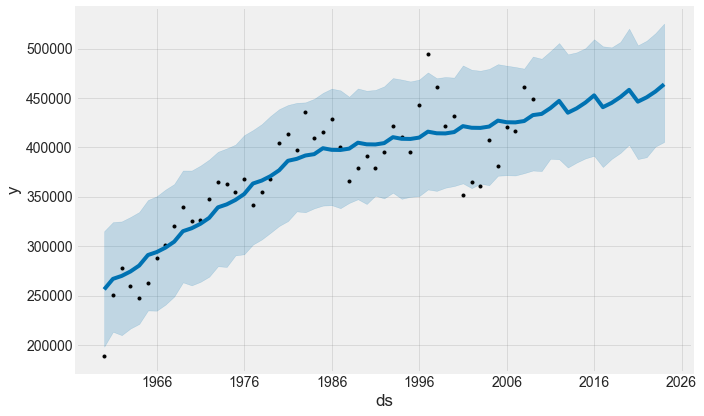

In [93]:
model.plot(forecast, uncertainty=True)
plt.show()

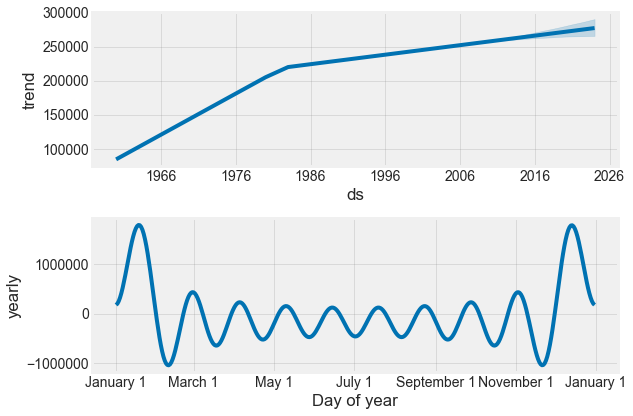

In [94]:
model.plot_components(forecast)
plt.show()